In [0]:
pip install tensorflow

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
# Network and training.
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

In [0]:
# Loading MNIST dataset.
   # verify
   # You can verify that the split between train and test is 60,000, and 10,000 respectively.
   # Labels have one-hot representation.is automatically applied
mnist = keras.datasets.mnist


In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784.
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
# Normalize inputs to be within in [0, 1].
X_train, X_test = X_train / 255.0, X_test / 255.0

In [0]:
print(X_train.shape[0], 'train samples')

60000 train samples


In [0]:
print(X_test.shape[0], 'test samples')


10000 test samples


In [0]:
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)
# Building the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
             input_shape=(RESHAPED,),
             name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
             name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
             name='dense_layer_3', activation='softmax'))
   # Summary of the model.
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model.
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [0]:
# Training the model.
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Epoch 1/200
375/375 [==============================] - 1s 3ms/step - loss: 0.5138 - accuracy: 0.8447 - val_loss: 0.1913 - val_accuracy: 0.9442
Epoch 2/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2366 - accuracy: 0.9295 - val_loss: 0.1419 - val_accuracy: 0.9569
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1782 - accuracy: 0.9467 - val_loss: 0.1156 - val_accuracy: 0.9647
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1500 - accuracy: 0.9557 - val_loss: 0.1031 - val_accuracy: 0.9703
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1308 - accuracy: 0.9605 - val_loss: 0.1024 - val_accuracy: 0.9693
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9646 - val_loss: 0.0984 - val_accuracy: 0.9703
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1073 - accuracy: 0.9664 - val_loss: 0.0908 - val_accuracy: 0.9753

In [0]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1370 - accuracy: 0.9796
Test accuracy: 0.9796000123023987


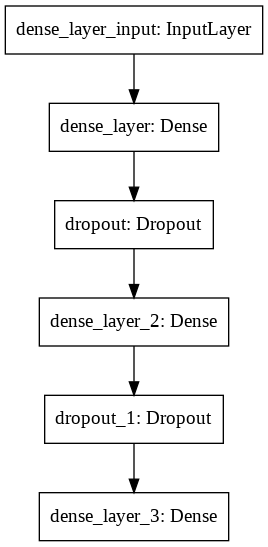

In [0]:
tf.keras.utils.plot_model(model)

In [0]:
model.save_weights('./my_modeldropadam')

In [0]:
	
import os

In [0]:
os.getcwd()


'/content'

In [0]:
model.save_weights('my_modeldropadam.h5', save_format='h5')

In [0]:
# model.save_weights('my_model.h5', save_format='h5')
# model.load_weights(file_path)

In [0]:
#json_string = model.to_json()  # save
#model = tf.keras.models.model_from_json(json_string) # restore
#yaml_string = model.to_yaml() # save
#model = tf.keras.models.model_from_yaml(yaml_string) # restore

In [0]:
json_string = model.to_json()

In [0]:
print(json_string)

{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense_layer", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout", "trainable": true, "dtype": "float32", "rate": 0.3, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_layer_2", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null